### This problem is about Breast Cancer Diagnosis. Here the target variable is 'target' which has '0' and '1' values, i.e. the target variable is binary and this is a classification dataset.

### Let's perform EDA first

#### Step 1: Download all the libraries which we generally use while performing EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

%matplotlib inline
sns.set_style('whitegrid')

#### Step 2: Import the data set on which EDA has to be performed

##### We will load the dataset from the SciKit learn library directly. But, the dataset is in slice format and not in Dataframe format. So, we have to convert it to Dataframe and then proceed with the EDA.

In [2]:
# Loading the Breast Cancer dataset from Scikit-learn library
from sklearn.datasets import load_breast_cancer

# Saving the Breast Cancer dataset to a variable
cancer = load_breast_cancer()

# Converting column names of Breast Cancer dataset to a list and then saving them it to a variable
col_names = list(cancer.feature_names)

# Appending 'Target' attribute to the column names list
col_names.append('target')

# Converting slice object to a dataframe by passing dataset and target values along with the attrbute names
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)

#### Step 3: Analyse the dataset and get to know which type of problem it is
    a. We are performing EDA on Breast Cancer Diagnosis dataset.
    b. The main intention of building a model on Breast Cancer Diagnosis dataset is to predict whether a person is going having Breast Cancer.
    c. This is a classification problem with two classes, '1' for having Breast Cancer and '0' for not having   Breast Cancer.

#### Step 4: Fetch a few rows to get a gist of the attributes in the data set, whether there are any attributes which are not adding value to the target variable, etc.

In [3]:
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


##### Since this is the pre-loaded dataset in Scikit Learn, this dataset will not have variables which are not adding value to the dataset.

#### Step 5: Get to know the structure of the data set using 'info()'method. Using this we can get to know below things:
    a. Data types of attributes in the data set
    b. Whether any of the attributes in the data set has null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

##### By having a look at info above, we can say that there are no null values.

#### Step 6: Get the 6-point summary using 'describe()' method.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


##### By looking at values below, we can say that other than below attributes, all are approximately symmetric:
    a. area error
    b. mean concave points
    c. mean concavity
    
Also, all of the above attributes are left skewed.

#### Step 7: Let's perform Univariate analysis

#### As first step, let's see the distribution of 'target' attribute, since it is the only categorical attribute

##### Let's define a function to plot the barplot with all the required info

In [6]:
# Defining a function to plot bar graph and fetch value counts of each categorical attribute
def bar_plot(variable):
      
    # get feature 
    var = df[variable]
    # count number of feature 
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values, rotation=90)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

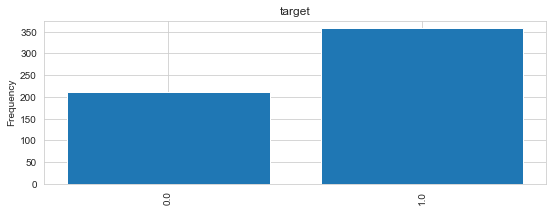

target:
1.0    357
0.0    212
Name: target, dtype: int64


In [7]:
bar_plot('target')

##### By looking at the distribution of target, we can say that the dataset doesn't have imbalance issue.5

#### Now let's see the distribution of all the continuous attributes, the ones other than 'target'.

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-8-3a99f22a4e4e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-8-3a99f22a4e4e>:9: UserWarning: FixedFormatter should only be used together with FixedLo

<ipython-input-8-3a99f22a4e4e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-8-3a99f22a4e4e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fu

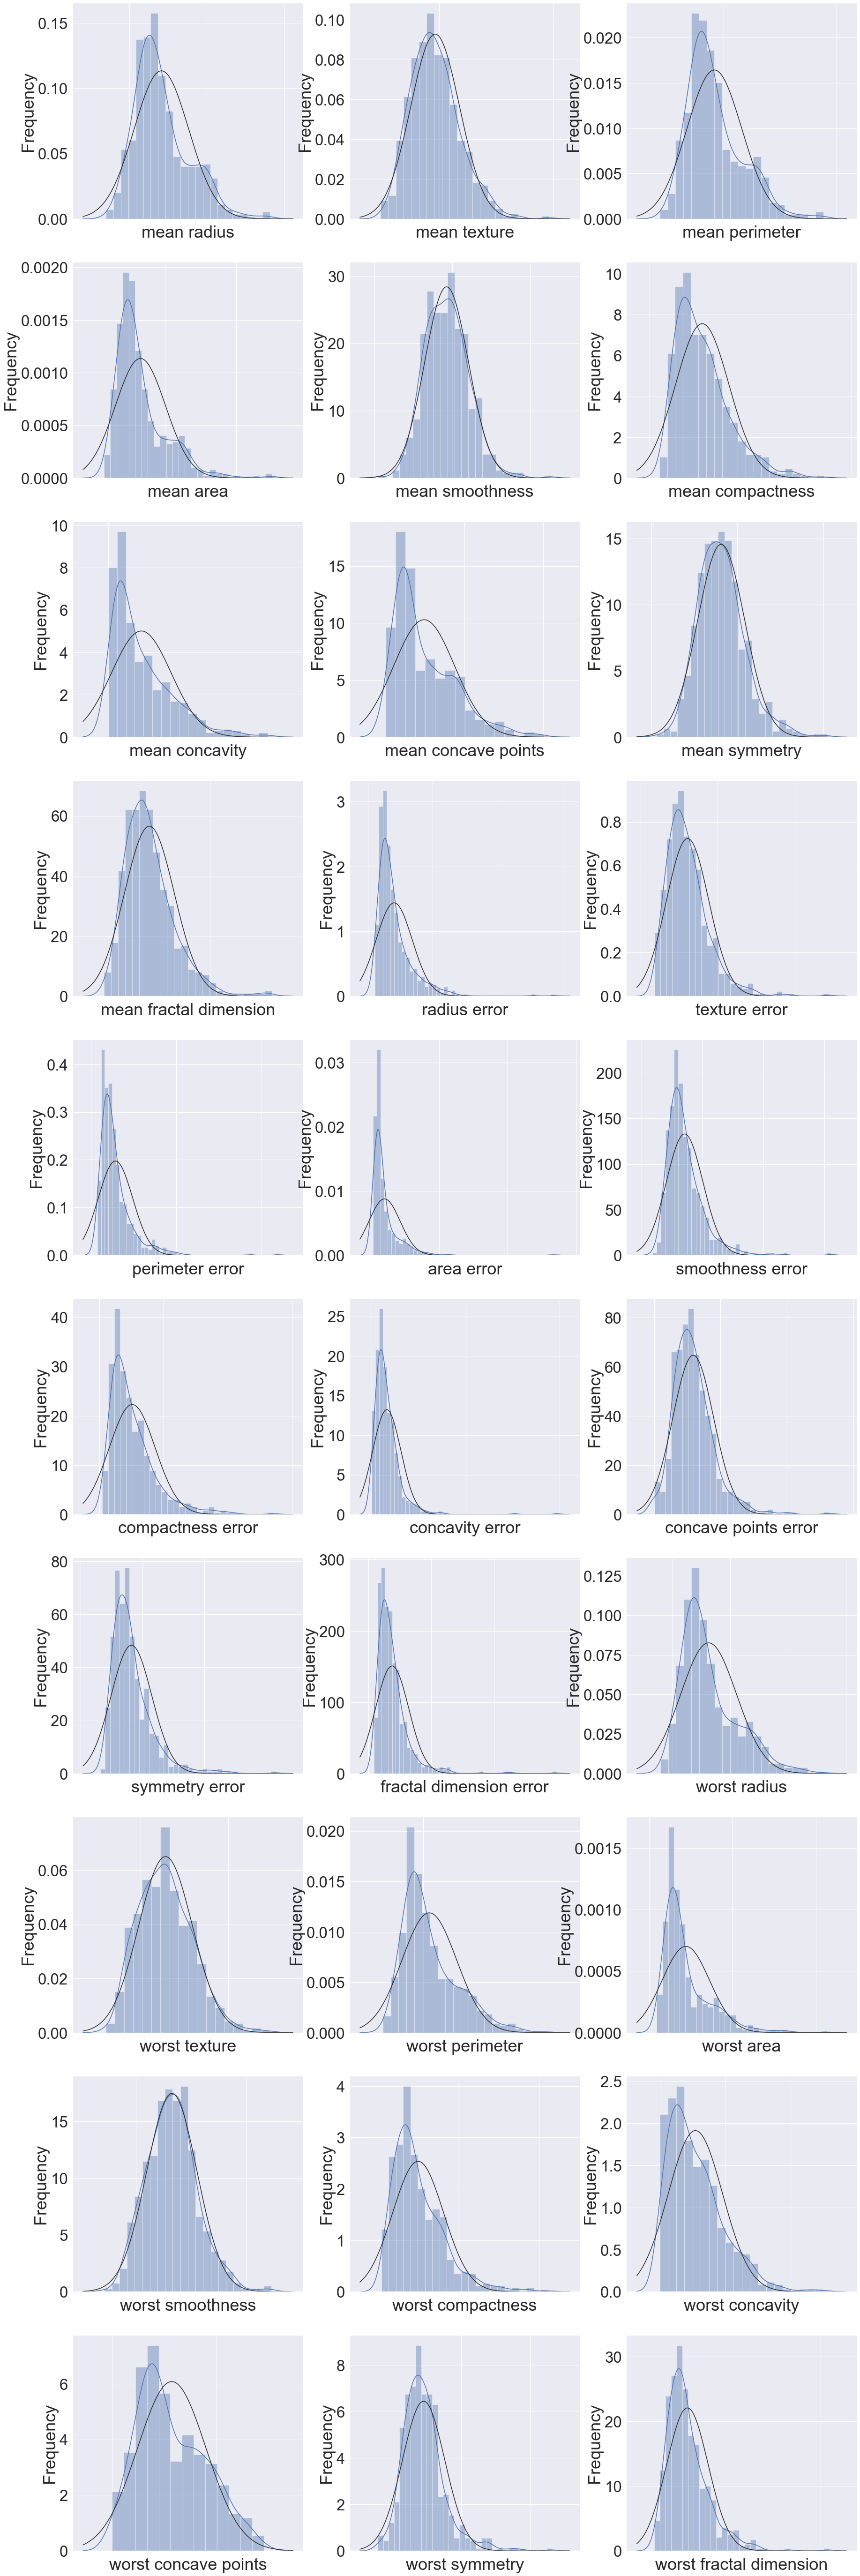

In [8]:
# Let's plot the graph for Non-categorical attributes
sns.set(font_scale=3)
plt.figure(figsize=(30, 100))


for i, column in enumerate(list(cancer.feature_names), 1):
    plt.subplot(10, 3, i)
    g = sns.distplot(df[column],fit=norm)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Frequency')
    plt.xlabel(column)

##### By looking at above plots, we can say that:
    a. Most of the attributes are approximately normally distributed
    b. Attributes which are not normally distributed are 'mean area', 'mean concavity', 'mean concave points',  'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area' and 'worst concave points'.

In [9]:
list(cancer.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

#### Step 8: Let's perform Data Sanitation

#### By looking at the 'info()', we already got to know that there are no null values. Hence we can skip the Null value Treatment

#### Let's check which attributes have Outliers 

In [10]:
# Mathematical Outlier detection

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [11]:
for i in list(cancer.feature_names):
    print(f"Number of Outliers in {i} is:", len(outliers_iqr(df[i])[0]))

Number of Outliers in mean radius is: 14
Number of Outliers in mean texture is: 7
Number of Outliers in mean perimeter is: 13
Number of Outliers in mean area is: 25
Number of Outliers in mean smoothness is: 6
Number of Outliers in mean compactness is: 16
Number of Outliers in mean concavity is: 18
Number of Outliers in mean concave points is: 10
Number of Outliers in mean symmetry is: 15
Number of Outliers in mean fractal dimension is: 15
Number of Outliers in radius error is: 38
Number of Outliers in texture error is: 20
Number of Outliers in perimeter error is: 38
Number of Outliers in area error is: 65
Number of Outliers in smoothness error is: 30
Number of Outliers in compactness error is: 28
Number of Outliers in concavity error is: 22
Number of Outliers in concave points error is: 19
Number of Outliers in symmetry error is: 27
Number of Outliers in fractal dimension error is: 28
Number of Outliers in worst radius is: 17
Number of Outliers in worst texture is: 5
Number of Outliers

##### Though there are many attributes which have outliers, none of the attribute has more than 7% of the outliers. Hence we can skip Outlier treatment.

#### Let's check whether there are any duplicates and remove them

In [12]:
# Check for duplicates
duplicate = df[df.duplicated()]

# This will fetch rows which are duplicate. As seen below, there are no duplicate rows in the Dataframe.
duplicate

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target


##### There are no duplicates in the data.

#### Step 9: Let's perform Bivariate analysis

#### Since we are working on SVM's, we have to see whether there is Linear Seperability in the data. Based on this we can conclude whether to use Linear SVM or Non-linear SVM.

#### Let's check whether any of the independent variables have discriminatory ability interms of target variable by taking mean & median as a measure and by plotting box plots

In [13]:
df.groupby('target').mean().T

target,0.0,1.0
mean radius,17.462830,12.146524
mean texture,21.604906,17.914762
mean perimeter,115.365377,78.075406
mean area,978.376415,462.790196
mean smoothness,0.102898,0.092478
mean compactness,0.145188,0.080085
mean concavity,0.160775,0.046058
mean concave points,0.087990,0.025717
mean symmetry,0.192909,0.174186
mean fractal dimension,0.062680,0.062867


In [14]:
df.groupby('target').median().T

target,0.0,1.0
mean radius,17.325000,12.200000
mean texture,21.460000,17.390000
mean perimeter,114.200000,78.180000
mean area,932.000000,458.400000
mean smoothness,0.102200,0.090760
mean compactness,0.132350,0.075290
mean concavity,0.151350,0.037090
mean concave points,0.086280,0.023440
mean symmetry,0.189900,0.171400
mean fractal dimension,0.061575,0.061540


##### By looking at the Mean and Median values of Independent attributes for normal and abnormal classes, we can say that a lot of variables are showing good discriminatory ability.

#### Let's plot Box plot to confirm the same

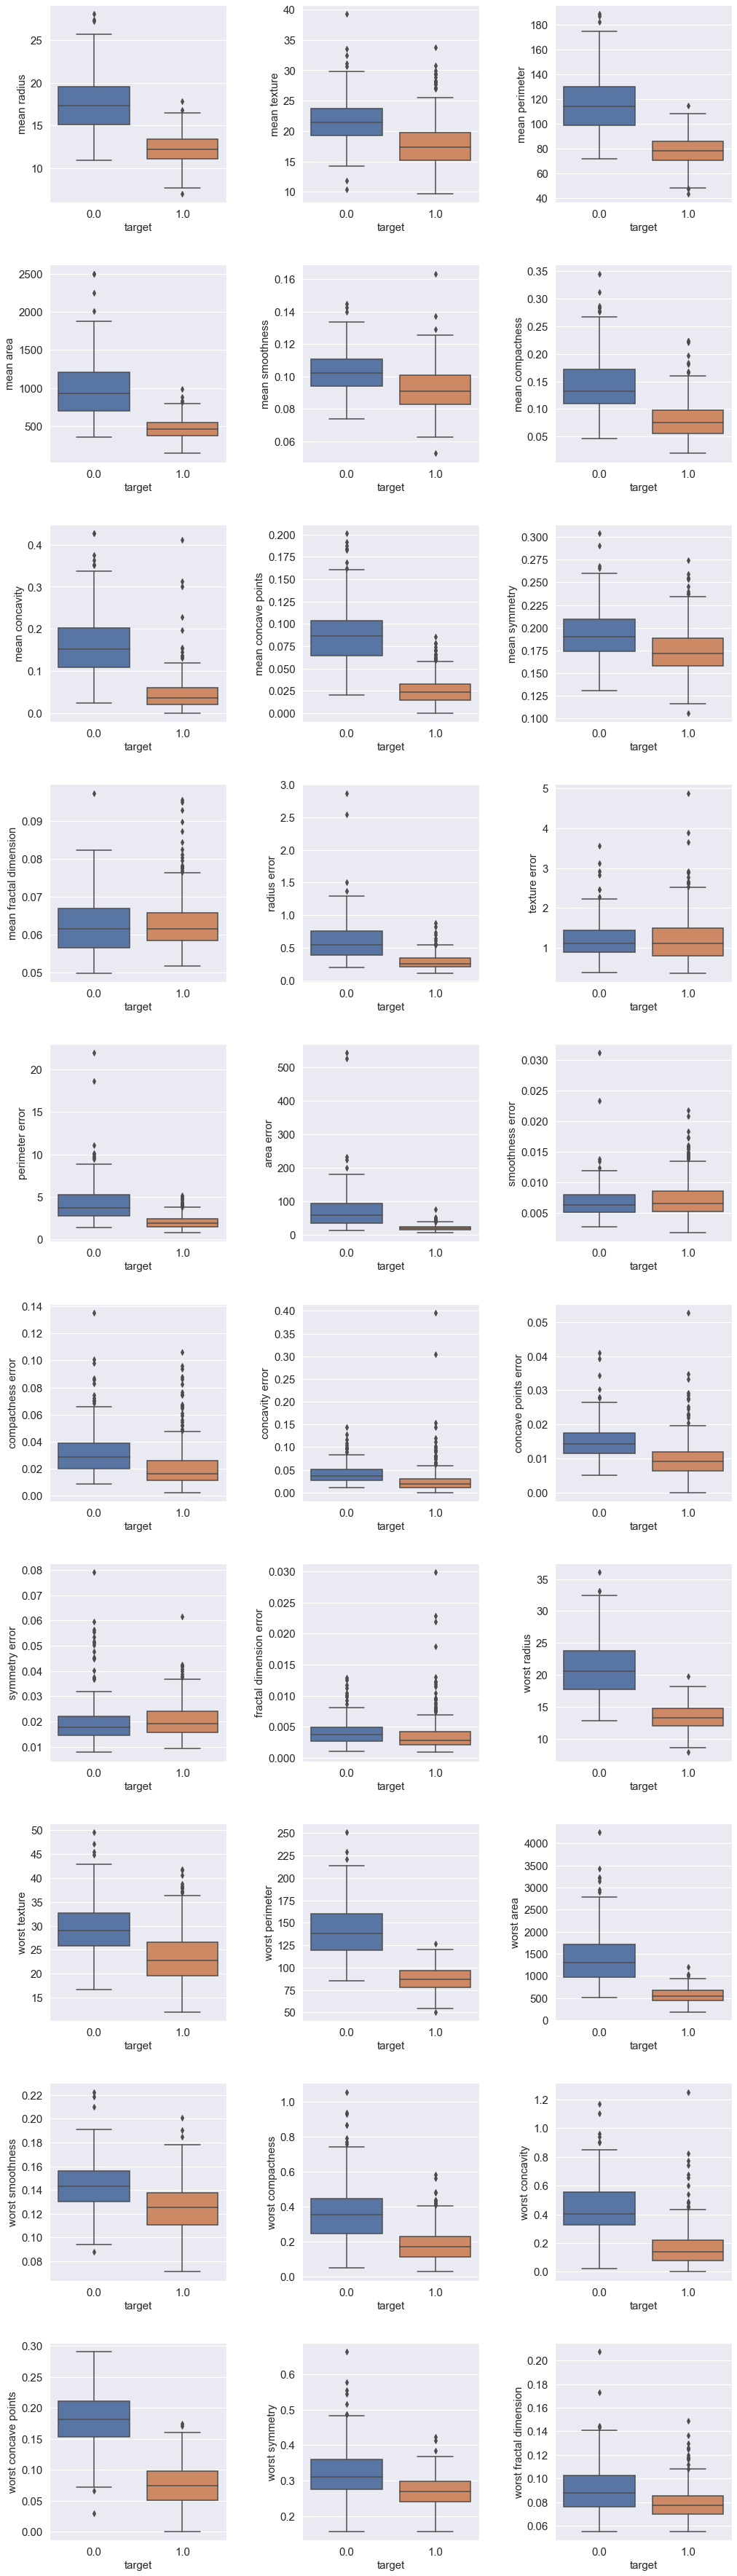

In [15]:
# Generating 10*3 matrix of box plots
fig, axes = plt.subplots(10, 3, figsize = (15,50))
axes = axes.flatten()

for i in range(len(list(cancer.feature_names))):
    p = sns.boxplot(x="target", y=df.iloc[:,i], data=df, orient='v', ax=axes[i])
    p.set_xlabel("target", fontsize = 15)
    p.set_ylabel(list(cancer.feature_names)[i], fontsize = 15)
    p.tick_params(labelsize=15)


plt.tight_layout()
plt.show()

##### By looking at the Box plots above, we can confirm that a lot of variables are showing good discriminatory ability.

#### To check whether there's any Linear Seperability, let's plot fifteen scatter plots, each with two independent variables and target variable.

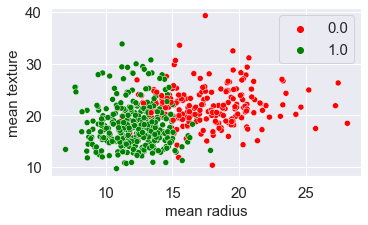

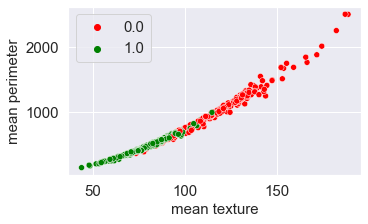

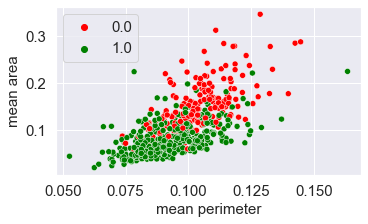

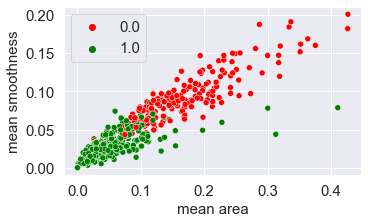

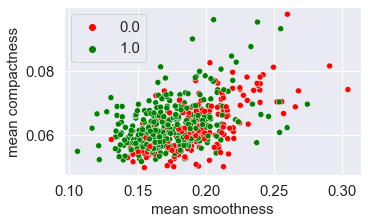

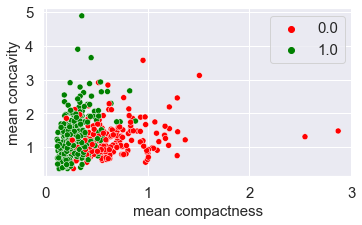

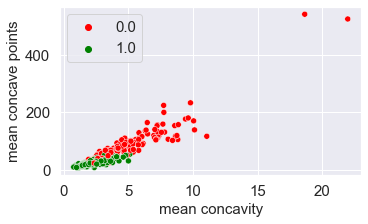

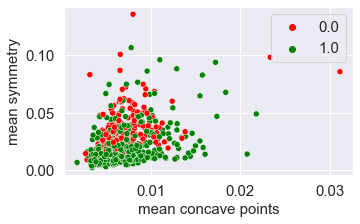

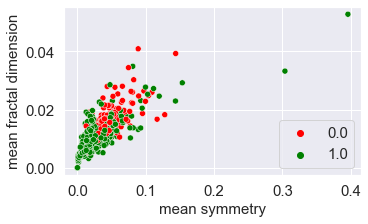

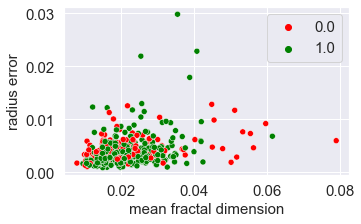

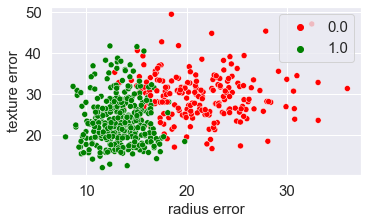

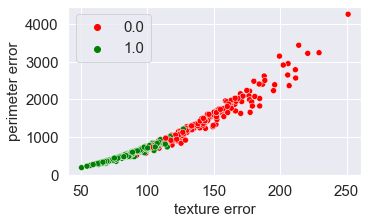

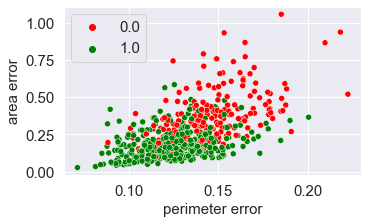

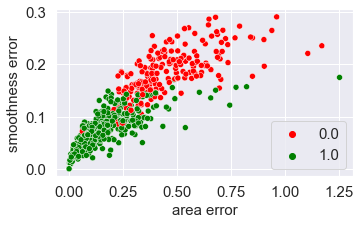

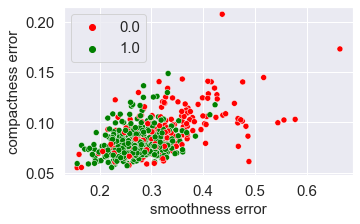

In [16]:
for i in range(0, int((len(list(cancer.feature_names)))/2)):
    ax = sns.scatterplot(x=df.iloc[:,(2*i)], y=df.iloc[:,(2*i)+1], hue = "target", data = df, palette =['red','green'])
    ax.set_xlabel(list(cancer.feature_names)[i], fontsize = 15)
    ax.set_ylabel(list(cancer.feature_names)[i+1], fontsize = 15)
    ax.tick_params(labelsize=15)
    plt.legend(fontsize = 15)
    plt.tight_layout()
    plt.show()

##### By looking at the scattered plots above, we can say that many attributes are showing Linear Seperability.

#### Since we are working on SVM, an ML model, Correlation should not be an issue. When we are trying to create new features, Correlation map would have been useful. But, we are not performing Feature Engineering here. So, we can skip plotting Correlation map. 

### Let's start with model building

#### Before Proceeding with Model building, we have to decide which SVM to be used:
    a. Since we have Linear Seperability in the data, we can use Linear SVM
    b. Since we have 30 independent variables, Non-Linear SVM with Polynomial Kernel may not give us good        results. Since, it increases dimensionality further. But, let's build a model and see whether we get better results.
    c. We can use Non-Linear SVM with RBF Kernel.
    
Let's build models using Linear SVM and Non-Linear SVM with RBF Kernel.

#### Step 1: Let's split data using "train_test_split". Since we are working on distance based algorithm, we have to perform scaling also. So, let's put scaling in pipeline so that both data split and scaling happens in a single step.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Splitting 'X' and 'Y'
X = df.drop('target', axis=1)
y = df.target

# To add scaling operations in the pipeline
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

# Splitting the data and and performing scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=48)

#### Step 2: Let's build a vanilla version of Linear SVM first

In [18]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual = True,random_state = 24)
model.fit(X_train, y_train)

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=24)

#### Step 3: Let's validate the results

#### Based on the data we have, we can figure out that two metrics are important to evaluate the model:
    a. Recall(Class-1/Cancer): This is the most important metric because if the person has cancer, doctors would try to teat the patient and save her life.
    b. precision(Class-0/No Cancer): This is second most important metric because if the person doesnot have cancer but predicted as having cancer, then lab or hospital will lose the reputation.

#### Let's write a function to fetch the results

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#### Let's fetch the results using "print_score" function we have written

In [20]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.43%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.968504    0.919732  0.934272    0.944118      0.936562
recall       0.836735    0.985663  0.934272    0.911199      0.934272
f1-score     0.897810    0.951557  0.934272    0.924684      0.933011
support    147.000000  279.000000  0.934272  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[123  24]
 [  4 275]]

Test Result:
Accuracy Score: 93.71%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.896552  0.937063    0.948276      0.943574
recall      0.861538   1.000000  0.937063    0.930769      0.937063
f1-score    0.925620   0.945455  0.937063    0.935537      0.936439
support    65.000000  78.000000  0.937063  143.000000    143.000000
___

##### By looking at the results, we can say that this model has given us very good results both on Train data and Test data. Recall for Class-1 and Precision for Class-0 on both Train data and Test data are very good.

##### Now that we have built Linear SVM, let's build models using Non-linear SVM's

#### Step 4: Let's build a Non-Linear SVM with Polynomial Kernel

In [21]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree polynomials 
model = SVC(kernel='poly', random_state = 24)
model.fit(X_train, y_train)

SVC(kernel='poly', random_state=24)

#### Step 5: Let's fetch the results using "print_score" function we have written

In [22]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.61%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.965217    0.884244  0.906103    0.924731      0.912186
recall       0.755102    0.985663  0.906103    0.870383      0.906103
f1-score     0.847328    0.932203  0.906103    0.889766      0.902915
support    147.000000  279.000000  0.906103  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[111  36]
 [  4 275]]

Test Result:
Accuracy Score: 92.31%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.876404  0.923077    0.938202      0.932584
recall      0.830769   1.000000  0.923077    0.915385      0.923077
f1-score    0.907563   0.934132  0.923077    0.920847      0.922055
support    65.000000  78.000000  0.923077  143.000000    143.000000
___

##### By looking at the results, we can say that this model has given us very good results in terms of Recall for Class-1 and Precision for Class-0 on both Train data and Test data. But, when compared to the Linear model, accuracy of both Train data and Test data has reduced.

##### let's build models using Non-linear SVM's using RBF Kernel and see whether we get better results.

#### Step 6: Let's build a Non-Linear SVM with RBF Kernel

In [23]:
model = SVC(kernel='rbf', random_state = 24)
model.fit(X_train, y_train)

SVC(random_state=24)

#### Step 7: Let's fetch the results using "print_score" function we have written

In [24]:
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.14%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.964602    0.878594  0.901408    0.921598      0.908273
recall       0.741497    0.985663  0.901408    0.863580      0.901408
f1-score     0.838462    0.929054  0.901408    0.883758      0.897793
support    147.000000  279.000000  0.901408  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[109  38]
 [  4 275]]

Test Result:
Accuracy Score: 91.61%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.866667  0.916084    0.933333      0.927273
recall      0.815385   1.000000  0.916084    0.907692      0.916084
f1-score    0.898305   0.928571  0.916084    0.913438      0.914814
support    65.000000  78.000000  0.916084  143.000000    143.000000
___

##### By looking at the results, we can say that this model has also given us very good results in terms of Recall for Class-1 and Precision for Class-0 on both Train data and Test data. But, when compared to the Linear model, accuracy of both Train data and Test data has reduced.

##### Now that we have built vanilla versions of Linear and Non-linear SVM's. Let's perform Hyper parameter tuning and see which model is the best. Since Polynomial Kernel models take a lot of time, let's skip them while performing Hyper parameter tuning.

#### Step 8: Let's perform Hyper parameter tuning using 'Recall' as scoring parameter on both Linear SVM and Non-linear SVM. Since Hyper parameter tuning on Non-linear model with Polynomial Kernel takes hours to get executed, let's skip it as of now.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001,.0001,.00001], 
              'kernel': ['rbf','linear']} 

grid = GridSearchCV(SVC(), param_grid, scoring='recall', refit=True, verbose=1, cv=5,n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 332 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 582 tasks      | elapsed:  4.9min


Best params: {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  6.8min finished


SVC(C=0.01, gamma=1)

#### Step 9: Let's fetch the results using "print_score" function we have written

In [26]:
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 65.49%
_______________________________________________
CLASSIFICATION REPORT:
             0.0         1.0  accuracy   macro avg  weighted avg
precision    0.0    0.654930   0.65493    0.327465      0.428933
recall       0.0    1.000000   0.65493    0.500000      0.654930
f1-score     0.0    0.791489   0.65493    0.395745      0.518370
support    147.0  279.000000   0.65493  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[  0 147]
 [  0 279]]

Test Result:
Accuracy Score: 54.55%
_______________________________________________
CLASSIFICATION REPORT:
            0.0        1.0  accuracy   macro avg  weighted avg
precision   0.0   0.545455  0.545455    0.272727      0.297521
recall      0.0   1.000000  0.545455    0.500000      0.545455
f1-score    0.0   0.705882  0.545455    0.352941      0.385027
support    65.0  78.000000  0.545455  143.000000    143.000000
_______________________________________________
Confu

/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Surya/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### By looking at the results, we can say that Hyper parameter tuning has given us good model in terms of Recall for Class-1. But in all other parameters, this model is has given us pathetic values.

##### Since we are focusing on Recall for Class-1 and Precision for Class-0, let's keep the scoring metric as "F1-score" and see whether we get better results.

#### Step 10: Let's perform Hyper parameter tuning using 'F1-score' as scoring parameter on both Linear SVM and Non-linear SVM

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100,1000], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001,.0001,.00001], 
              'kernel': ['rbf','linear']} 

grid = GridSearchCV(SVC(), param_grid, scoring='f1', refit=True, verbose=1, cv=5,n_jobs=-1)
grid.fit(X_train, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 126 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  7.1min finished


Best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


SVC(C=1, gamma=1, kernel='linear')

#### Step 11: Let's fetch the results using "print_score" function we have written

In [28]:
print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.71%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.971631    0.964912  0.967136    0.968272      0.967231
recall       0.931973    0.985663  0.967136    0.958818      0.967136
f1-score     0.951389    0.975177  0.967136    0.963283      0.966969
support    147.000000  279.000000  0.967136  426.000000    426.000000
_______________________________________________
Confusion Matrix: 
 [[137  10]
 [  4 275]]

Test Result:
Accuracy Score: 95.80%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   0.983607   0.939024  0.958042    0.961315      0.959289
recall      0.923077   0.987179  0.958042    0.955128      0.958042
f1-score    0.952381   0.962500  0.958042    0.957440      0.957900
support    65.000000  78.000000  0.958042  143.000000    143.000000
___

##### By looking at the results, we can say that this model has given us good results when compared to the Hyper parameter tuned model using "Recall" as target metric.

##### When we compare the results of all the models, we can say that two models has given us good results when compared to other models. One is vanilla version of Linear SVM and the other is Hyper parameter tuned model using 'F1-score' as scoring parameter. Both these models have given us similar results. Though Linear SVM has given us a score of 1.0 for both Recall for Class-1 and Precision for Class-0 on Test data, Hyper parameter tuned model using 'F1-score' as scoring parameter has given similar results in Train data. But, we can consider vanilla version of Linear SVM for model building as it has given us good results in terms of Recall for Class-1 and Precision for Class-0.